# UCB CE170A Assignment 4 
Version: 1.0

In [ ]:
# get the data
!wget "https://raw.githubusercontent.com/UCB-CE170a/Fall2020/master/homeworks/hw4/assignment4_data.csv"

## Background

You are provided surface-wave field data from a real field deployment to measure the shear wave velocity profiles at sites surrounding the Palo Verde Nuclear Power Station, near Phoenix, Arizona.  In the field, we capture the wavefield and then use the Fourier transform method to compute the linear spectra for two sensor, the field sensor and a reference sensor.  The fancy and expensive Spectrum Analyzer we have also computes the cross-power spectra in real time.  


<center>
<img src="https://azbigmedia.com/wp-content/uploads/2019/10/Palo-Verde.jpg" alt="A bridge." width="400" />

    The nation’s largest nuclear power plant, Palo Verde Generating Station
    
</center>

Image Source: https://azbigmedia.com/business/palo-verde-inside-the-nations-largest-nuclear-power-plant/


You are back in the office and need to convert the data through a sequence steps to 

	1. a wrapped phase data set, 
	2. an unwrapped phase data set, 
	3. a Rayleigh wave dispersion curve of velocity versus wavelength (or frequency) using the sensor separations, 
	4. a simple conversion of the dispersion curve into a layered Rayleigh wave-depth profile using the Satoh (1998) method, 
	5. a shear-wave velocity profile versus depth, and finally 
	6. a computed average velocity in the upper thirty meters of the ground (Vs,30m).  

Your task for this assignment is to write code for each step above and plot corresponding results

## Procedures 

### Step 1: Wrapped Phase 



The phase of data indicates the degrees of lag between the reference seismometer and sensor placed at the end of the array.  In the figure, below, you can see that the waves approach reference sensor 1 before they arrive at sensor 2.  The “phase angle” is the number of radians or degrees sensor 2 lags behind sensor 1 at an instant.

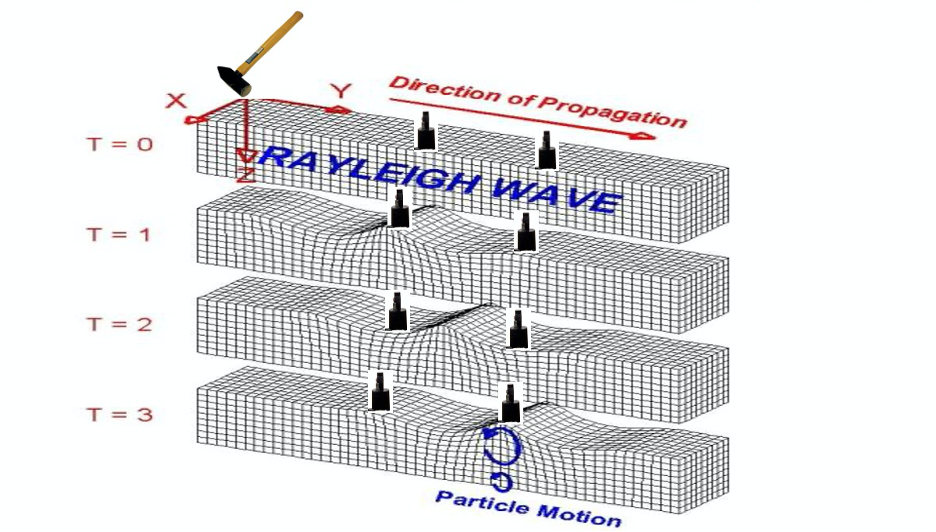

The cross power spectrum is used to compute the phase angle-lag and is the inverse tangent of the ratio of the imaginary ($Im(G_{xy} (ω)$)  and real portions $(Re(G_{xy} (ω))$  of the cross power spectrum:

$\theta_{xy}(\omega) = atan2 ^{-1} (Im(G_{xy}(ω)),Re(G_{xy} (ω))$;  where atan2 is the generalized arctangent function, see https://en.wikipedia.org/wiki/Atan2

The data you receive from the spectrum analyzer has the columns frequency, $Im(G_{xy} (ω)$ and $Re(G_{xy} (ω))$. 

Fill the TODO in code cells below to complete step 1. 

In [ ]:
"""
Load Data 
"""
import pandas as pd

D_SENSOR = 50 # Sensor Seperation (m)
data_path = './assignment4_data.csv'

# TODO: Read the data using pandas (Hint: Go back to assignment2 if your dont know how to do it)
df = 
df.head()

In [ ]:
"""
Phase Calculation (wrapped)
"""
import numpy as np
def get_wrapped_phase(real,img):
  """Get the unwrapped phase 
    Args:
      real: real part of the cross pwer spectrum 
      img: imaginary part of the cross pwer spectrum 

    Returns:
      theat_deg: unwrapped phase in degree
  """
  # TODO: calculate the wrapped phase (hint: use the numpy library and be aware that the equation above gives you unit in radians)

  return theta_deg

# TODO: calculate the wrapped phase use loaded data 
real = df['Re'].to_numpy()
img = df['Im'].to_numpy()

theta_deg

In [ ]:
"""
Visualize the result 
"""
import matplotlib.pyplot as plt
# TODO: Visualize frequency Vs. wrapped phase. (hint: Check plotting in Assignemnt1 or 2)



### Step 2: Phase Unwrapping 

To unwrapped phase data we need to know when these data jump from the first phase to the second, third, and so on.   For example, at a frequency of 32Hz on the plot above, right, the data pass through the first full 360° cycle, and thus the phase values between 32Hz and 60Hz represent the phase range of 360°-720° (2$\pi$-4$\pi$).  We say that as the data pass through -180°-to- +180°, they have jumped from phase -0 to phase-1.  At 540°, the jump is to phase-2, and so on.   This adjustment corrects the phase into a continuous plot. The correction calculation as follows:

$\theta_{xy_unwrapped} = \theta_{xy} - (Jumps)*360$ (degrees), or 

$\theta_{xy_unwrapped} = \theta_{xy} - (Jumps)*2\pi $ (radians)

A conceptual example of wrapped phase data for a clock and seismic waves is below:
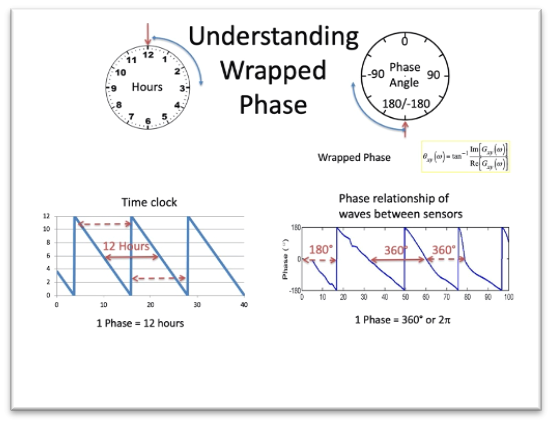

In [ ]:
def find_jumps(theta_wrapped):
  """Get jumps for wrapped data 
    Args:
      theta_wrapped: wrapped phase in degree 

    Returns:
      jumps: jumps for the data 
  """
  # TODO: write code to get jumps from wrapped phase
  return jumps
       

def wrap2unwrap(theta_wrapped):
  """Get the unwrapped phase 
    Args:
      theta_wrapped: wrapped phase in degree 

    Returns:
      theta_unwrapped: unwrapped phase in degree
  """
  # TODO: covert wrapped to unwrapped using concept above 
  return theta_unwrapped

theta_unwrapped = wrap2unwrap(theta_deg)


In [ ]:
"""
Visualize the result 
"""
import matplotlib.pyplot as plt
# TODO: Visualize frequency Vs. unwrapped phase. (hint: Check plotting in Assignemnt1 or 2)



### Step 3: A Rayleigh wave dispersion curve of velocity versus wavelength (or frequency) using the sensor separations

Wavelength is calculated as:

$\lambda(\theta({Deg})) = (d_{s}-d_{ref})\frac{360}{\theta_{degree}}$

$\lambda(\theta({Rad})) = (d_{s}-d_{ref})\frac{2\pi}{\theta_{rad}}$

Then the Rayleigh wave velocity $V_r$ is computed as 

$V_{r}(f) = \frac{(d_{s}-d_{ref})}{t(f)}$, or 


$V_{r}(f) = f\lambda(f)$


Sensor seperation $(d_{s}-d_{ref})$ is given as 50m in this case. 

In [ ]:
# Calculate wavelength 
def get_wavelength(d,theta_degree):
  """Get the wavelength 
    Args:
      d: sensor seperation distance (m)
      theta_degree: unwrapped phases in degree 

    Returns:
      lam: corresponding wavelengths (m)
  """
  # TODO: calculate wavelength
  return lam

def get_vr(freq, lam):
  """Get the Rayleigh wave velocity  
    Args:
      freq: frequency (Hz)
      lam: wavelength (m)
    Returns:
      vr: Rayleigh wave velocity  (m/s)
  """
  # TODO: calculate the Rayleigh wave velocity using information provided before
  return vr 

lam = get_wavelength(D_SENSOR,theta_unwrapped)
vr = get_vr(freq,lam)

In [ ]:
"""
Visualize the result (Wavelength Vs Vr)
"""
import matplotlib.pyplot as plt
# TODO: Visualize wavelength Vs. Vr. 



### Step 4: a simple conversion of the dispersion curve into a layered Rayleigh wave-depth profile using the Satoh (1998) method

Satoh et al. (1991) developed a technique termed the (Simplified Inversion Method) SIM method that computes the shear wave velocity profile as a function of the incremental slope of the Rayleigh wave dispersion curve where:

$V_{RN,normal-dispersion} =  = \frac{\bar{V_{Rn}}D_{n} - \bar{V_{Rn-1}}D_{n-1} }{D_{n}-D_{n-1}}$

$V_{RN,inverted-dispersion} =  = \frac{D_{n}-D_{n-1}}{\frac{D_{n}}{\bar{V_{Rn}}}- \frac{D_{n-1}}{\bar{V_{Rn-1}}}}$

The dispersion curve $V_R$ plotted against $\lambda_R$ is converted into an apparent velocity ($\bar{V_{R}}$) and depth (z) by converting $\lambda_R$ to an estimated depth of $z  = a_R∙λ_R  ≈0.72∙λ_R $. The parameter $a_R$ is a penetration depth coefficient optimized to achieve a minimum weighted average difference between the simplified velocity profile and that computed through the more advanced inversion methods. The apparent phase velocity, $\bar{V_{R}}$ , is approximated as the velocity at each segment node (layer interface) of a multi-linear curve fit to the dispersion curve. A positive slope of a segment indicates normal dispersion, a negative slope indicates inverted dispersion. The value of $\bar{V_{R}}$ for each individual layer is calculated using the equations above for the cases of normal dispersion or inverted dispersion, respectively. The approach of Pelekis and Athansopoulos (2011) improves on the Satoh et al. (1991) method notably by optimizing the penetration depth coefficient $a_R$.

In [ ]:
"""
Calculate Rayleigh Wave dispersion curve 
"""
def get_z(lam):
  # TODO: convert weavelength to z
  return z 

def get_vr_satoh(vr,z):
  """Get the layered Rayleigh wave velocity using the Satoh method
    Args:
      vr: Rayleigh wave velocity (m/s)
      z: estimated depth (m)

    Returns:
      vr_satoh: layered Rayleigh wave velocity using the Satoh method (m/s)
  """
  # TODO: calculate layered Rayleigh wave velocity using the Satoh method 

  return vr_satoh

z = get_z(lam)
vr_satoh = get_vr_satoh(vr,z)

In [ ]:
"""
Visualize the result
"""
import matplotlib.pyplot as plt
# TODO: Visualize depth (z) Vs. Vr_satoh.



### Step 5: Plot and data file of the a shear-wave velocity versus depth profile.

For reasonable values of Poisson Ratio for earth materials, between 0.30 and 0.49,  Viktorov (1967) shows that the shear wave velocity ranges between 105%-115% of the measured Rayleigh wave velocity.

$\frac{V_R}{V_S} = K = \frac{0.87+1.12\nu}{1+\nu} $

such that across the Poisson range 0.2<$\nu$ <0.49,  the range of K is 0.87<K<0.96.

The inversion method seeks to infer an acceptable best-fit model of seismic shear wave velocity, $V_S$, of the ground given the measured dispersive characteristics of Rayleigh waves observed in the frequency domain, and the estimated profile of Poisson ratio and material density.  

In our case, we use 

$V_s = （V_R-4）/0.89$;

$Z = \alpha_r \lambda_R$, where $\lambda_R = 0.72$ 


In [ ]:
"""
Calculate Vs using equation above 
"""
# TODO: Calculate Vs from Vr_satoh

In [ ]:
"""
Visualize the result
"""
import matplotlib.pyplot as plt
# TODO: Visualize depth (z) Vs. Vs_satoh.

### Step 6: a computed average velocity in the upper thirty meters of the ground (Vs,30m). 

An important parameter used in ground motion models is the averaged shear wave velocity of the uppermost thirty meters of the Earth.  The standard equation used to calculate average velocity is as follows:

$\bar{V_{s}}=  \frac{\sum_{i=1}^{n} d_{i}}{\sum_{i=1}^{n} t_{i}} = \frac{\sum_{i=1}^{n} d_{i}}{\sum_{i=1}^{n} \frac{d_i}{v_{s,i}}}$

Where, $d_i$ is the depth interval between measured data; $t_i$ is the travel-time interval between measured data; $V_{s,i}$ is the shear wave velocity  estimated for the interval.

Use the equation above to calculate the averaged shear wave velocity of the uppermost thirty meters of the Earth, $V_{s30}$. Hint: we handle the first shallowest data by assuming uniform velocity above this layer, which means t1 = z1/Vs1.

In [ ]:
"""
Calculate Vs30, compare your result with the data for sanity check .
"""
def find_vs30(vs,z):
  """Average velocity in the upper thirty meters of the ground
    Args:
      vs: Estimated shear wave velocity (m/s)
      z: estimated depth (m)

    Returns:
      vs30: Average velocity in the upper thirty meters of the ground (m/s)
  """
  # TODO: Calculate average velocity in the upper thirty meters of the ground
  # Hint: Pay attention to the cornner case (the first shallowest data)
  return vs30

vs30 = find_vs30(vs_sim,z)
vs30
